# Assigment 2: Mashine Learning - HT

We pick the share price for Norwegian airlines
* Predict stock market price for Norwegian airlines. Create a prediction algorithm which predicts the price of this stock on a specific date. Input will be date and output should be price of that stock (close value in the data file). You should also show the predction percentage score. Data file: "NAS.csv"

What should we do:
* In this exercise2 we will predict the price of the share for the Norwegian airlines on a specific date using linear regression. We will use training data that has "Date" and the corresponding "close price" and train a linear regression model using sclern linear regression class, Later, the prediction method is used on a linear regression object to make an actual forecast, that is to show the predction percentage score. 
* But first of all we have to work with data in data file: "NAS.csv"

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("NAS.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


# Data Wrangling

In [3]:
'''Finding out the Null values in the dataset. True = null value and False = not null'''
dataset.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...
4248,False,False,False,False,False,False,False
4249,False,False,False,False,False,False,False
4250,False,False,False,False,False,False,False
4251,False,False,False,False,False,False,False


In [4]:
dataset.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [5]:
dataset.dropna(inplace = True)

In [6]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
print('No. of passangers in dataset now:', (len(dataset.index)))

No. of passangers in dataset now: 4218


In [8]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [9]:
dataset.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'],axis = 1,inplace= True)

In [10]:
'''converted dataset['Date'] to date format'''
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [11]:
'''creating new data fields'''
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = month = dataset['Date'].dt.month
dataset['Day'] = day   = dataset['Date'].dt.day
encodeDayName = pd.get_dummies(dataset['Date'].dt.day_name())
dataset = pd.concat([dataset,encodeDayName['Monday'],encodeDayName['Tuesday'],encodeDayName['Wednesday'],encodeDayName['Thursday'],encodeDayName['Friday']],axis = 1)

In [12]:
'''set the Date like index'''
dataset.index = dataset['Date']
dataset = dataset.drop(['Date'], axis=1)

In [13]:
'''Clean input data'''
dataset

,Close,Year,Month,Day,Monday,Tuesday,Wednesday,Thursday,Friday
Date,,,,,,,,,
2003-12-18,19.139799,2003,12,18,0,0,0,1,0
2003-12-19,18.454201,2003,12,19,0,0,0,0,1
2003-12-22,18.054300,2003,12,22,1,0,0,0,0
2003-12-23,17.425800,2003,12,23,0,1,0,0,0
2003-12-29,17.254400,2003,12,29,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-10-12,0.676800,2020,10,12,1,0,0,0,0
2020-10-13,0.600600,2020,10,13,0,1,0,0,0
2020-10-14,0.626000,2020,10,14,0,0,1,0,0


<AxesSubplot:xlabel='Date'>

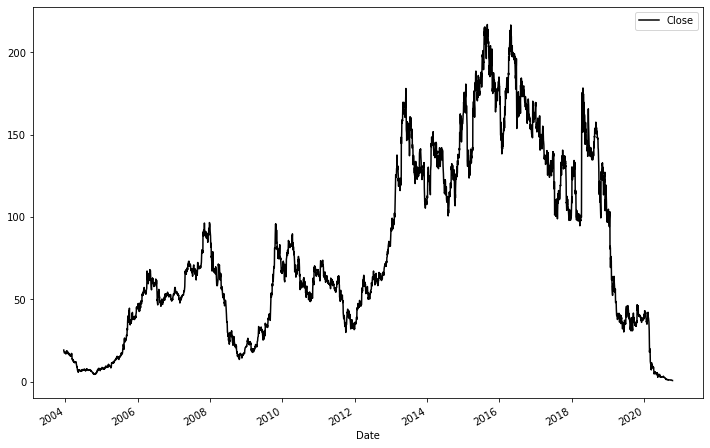

In [14]:
dataset.plot.line(y=['Close'], figsize=(12,8), color = "black")

# linear regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
x = dataset.drop('Close',axis='columns')
y = dataset['Close']

In [17]:
# training
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.1)
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((422, 8), (422,))

In [18]:
# Create linear regression object
regObj = LinearRegression(normalize=True)
regObj.fit(x_train,y_train)

LinearRegression(normalize=True)